In [1]:
library(Seurat)

In [42]:
c.data <- Read10X(data.dir = "/extra/schule/ctr/")
# Initialize the Seurat object with the raw (non-normalized data).
scm <- CreateSeuratObject(
    counts = c.data, 
    project = "control", 
    min.cells = 3,
    min.features = 200)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”

In [43]:
scm[["percent.mt"]] <- PercentageFeatureSet(object = sc, pattern = "^MT-")

In [6]:
head(sc[["percent.mt"]])

percent.mt
AAACCTGCACGCTTTC 2.9947917 
AAACCTGGTGAAATCA 3.2088276 
AAACCTGGTTACAGAA 4.2695010 
AAACCTGGTTCCATGA 0.2125936 
AAACCTGTCACAGGCC 6.1853058 
AAACCTGTCCCATTTA 4.3614262

In [33]:
dim(sc)

[1] 18640  3709

Warning message:
“Removed 261 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 261 rows containing missing values (geom_point).”

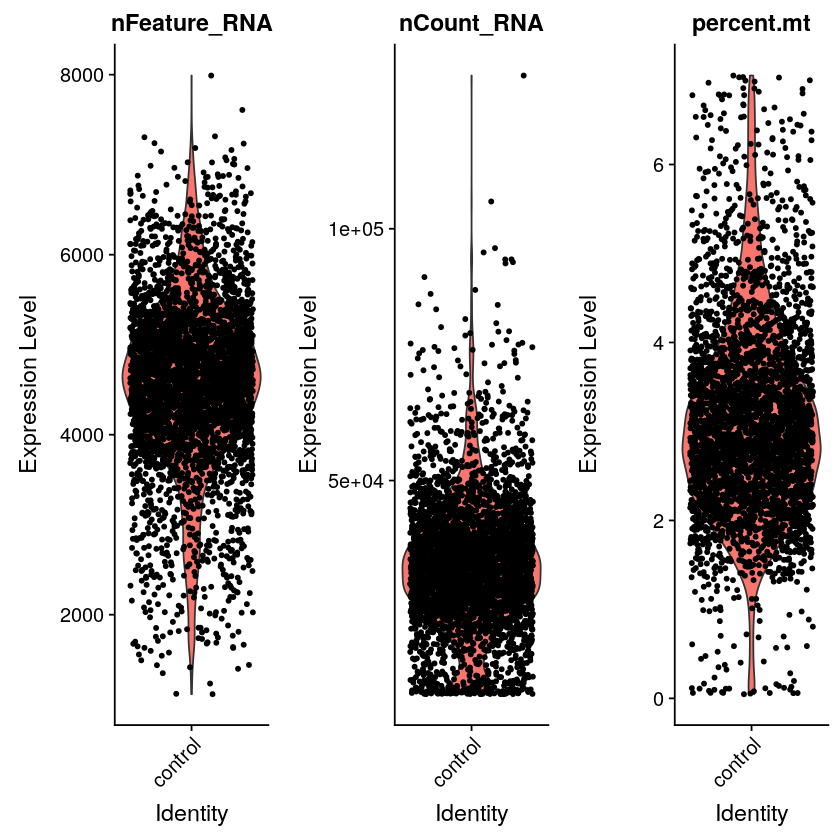

In [44]:
VlnPlot(object = scm, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [22]:
plot1 <- FeatureScatter(object = sc, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(object = sc, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")

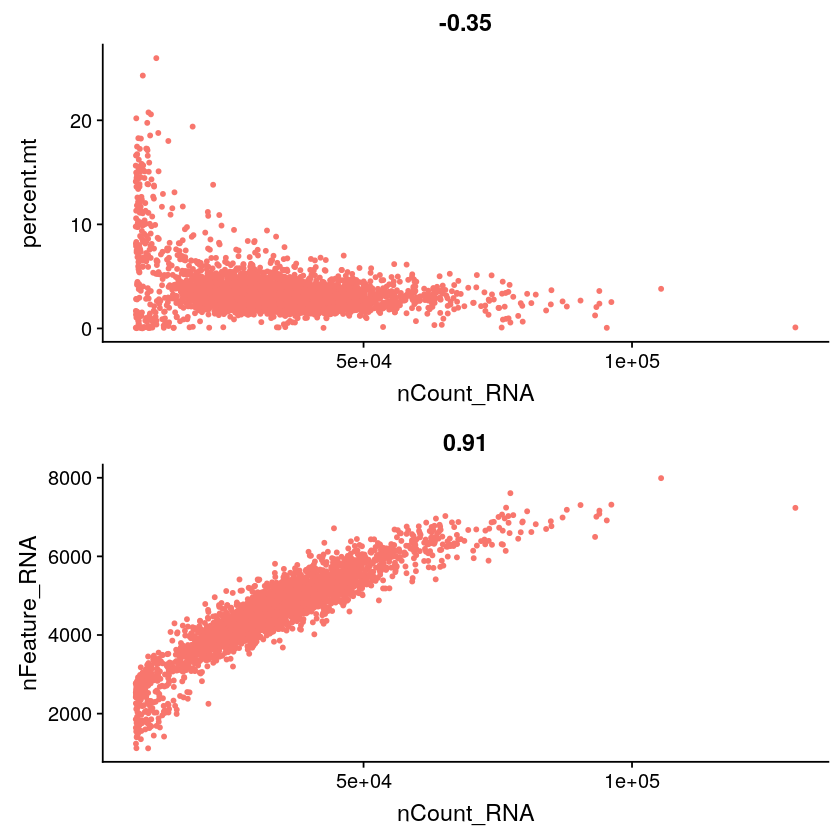

In [25]:
CombinePlots(plots = list(plot1, plot2), legend="none", ncol=1)

A few cells with low counts and high mitochondrial counts that we wish to filter out. Let's get rid of any cells with a MT count greater than 10, features > 2000, and features < 6000, counts > 7e4


In [30]:
sc.sub <- subset(x=sc, subset = nFeature_RNA > 2000 & nFeature_RNA < 7000 & 
             percent.mt <= 7 & 
             nCount_RNA < 7e4 & nCount_RNA > 3e3)

In [31]:
plot1 <- FeatureScatter(object = sc.sub, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(object = sc.sub, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")

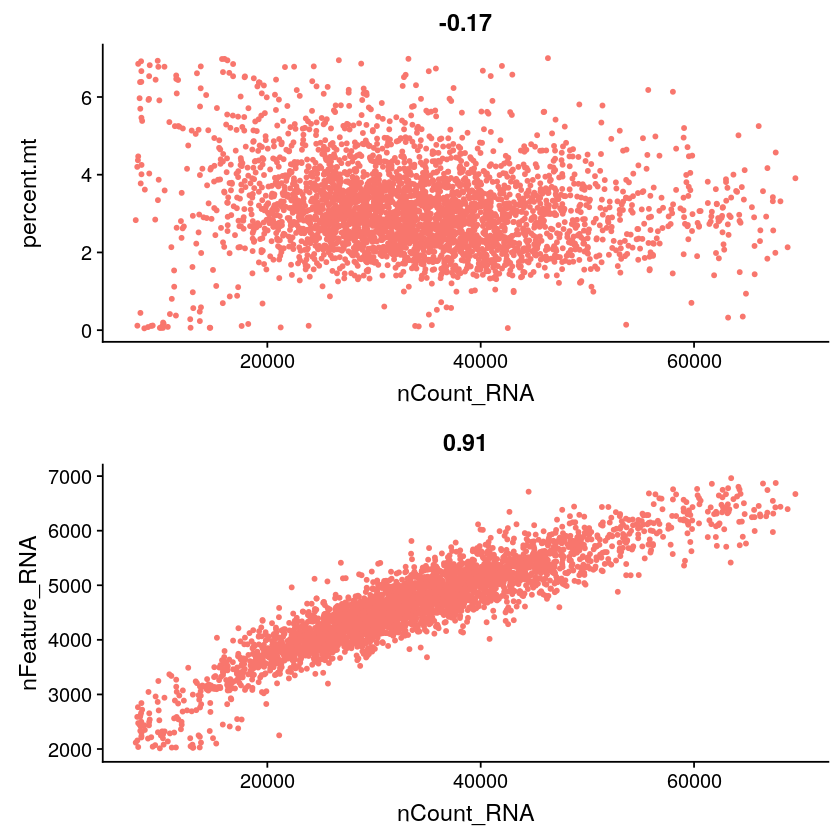

In [32]:
CombinePlots(plots = list(plot1, plot2), legend="none", ncol=1)

In [40]:
data.frame(orig=dim(sc), sub=dim(sc.sub), row.names=c("Genes", "Cells"))

orig  sub  
Genes 18640 18640
Cells  3709  3448

We seem to have less impact from MT genes now, and less cell outliers. Filtering has not removed too many cells from the analysis.

This seems good enough for now, let's normalize and see how things cluster.

# Normalisation

In [41]:
# These are actually defaults.
sc <- NormalizeData(object= sc.sub, normalization.method = "LogNormalize", scale.factor=10000)

In [42]:
sc <- FindVariableFeatures(object = sc, selection.method = "vst", nfeatures = 2000)

In [49]:
# Most variable genes
topN <- head(x = VariableFeatures(object = sc), 30)
topN

[1] "MSMP"      "FST"       "HIST1H4C"  "BIRC5"     "UBE2C"     "GDF15"    
 [7] "REG4"      "AREG"      "TUBA1B"    "UTS2"      "PTTG1"     "HSPA5"    
[13] "HMGB2"     "DDIT3"     "UBE2S"     "PAGE5"     "PLAU"      "TNFRSF12A"
[19] "ERRFI1"    "TOP2A"     "FTH1"      "CENPA"     "CTAG2"     "IL13RA2"  
[25] "OASL"      "CKS2"      "FOSL1"     "HMGA1"     "TSPAN19"   "ATF3"

In [50]:
plot1 <- VariableFeaturePlot(object = sc)
plot2 <- LabelPoints(plot = plot1, points = topN, repel = TRUE)

When using repel, set xnudge and ynudge to 0 for optimal results


Warning message:
“Transformation introduced infinite values in continuous x-axis”

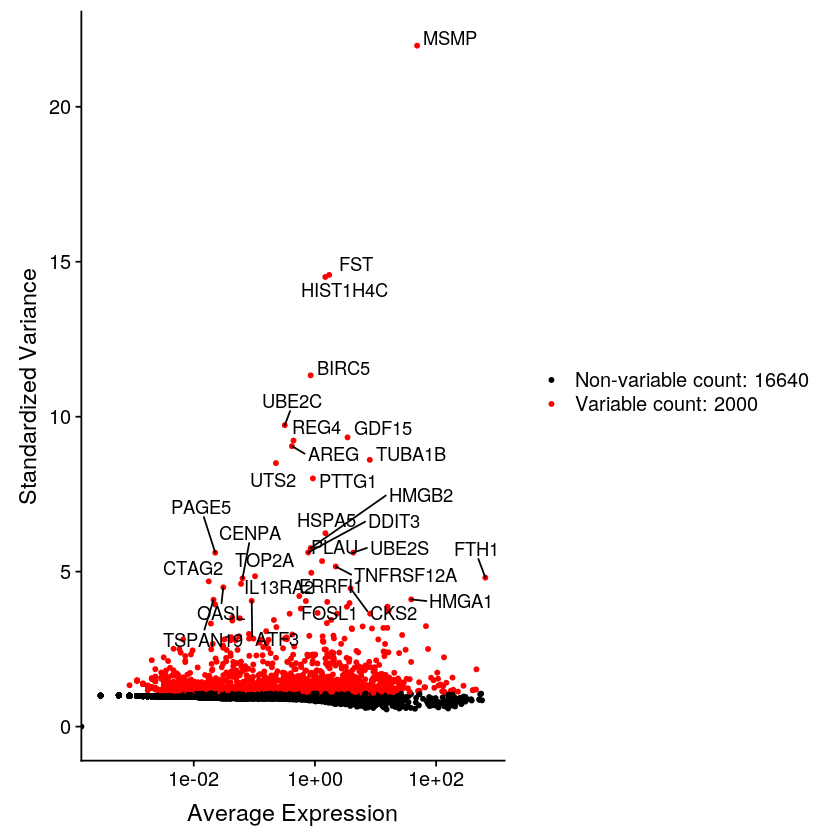

In [51]:
plot2

# Scaling

In [52]:
# Performed prior to dim reduction so that only variance is used for dimred and not total counts or other unwanted var

In [54]:
all.genes <- rownames(x = sc)

In [55]:
sc <- ScaleData(object = sc, features = all.genes)

Centering and scaling data matrix


Removing cell-cycle variation may be required, but removing mitochondrial contamination is likely not neccesary since we have already filtered out the cells with more than 7% MT contamination.

# Dimensional Reduction

In [56]:
# PCA
sc <- RunPCA(object = sc, features = VariableFeatures(object = sc))

PC_ 1 
Positive:  HSP90AA1, ENO1, RAN, PRDX1, TPI1, NME1, PFDN2, ANXA2, HN1, PSMA7 
	   PARK7, MGST1, CD59, ETFB, FABP5, PRDX2, CD63, LDHA, COX5B, GADD45GIP1 
	   S100A11, NDUFB9, RBM8A, PSME2, PKM, TXN, CFL1, PGK1, CD320, TUBA1B 
Negative:  GNB2L1, EEF1A1, RPL12, RPS4X, RPS6, RPL10, RPL7, RPS3A, RPL39, SLC25A6 
	   RPL4, RPL26, CREB3L1, RPSA, CDKN2C, RPS24, TMEM158, SUCO, ZNF581, CTD-2589M5.4 
	   TCF4, PABPC1, LDOC1, FAM65B, BTG1, H1F0, LMO4, CD24, SPINK5, SLC12A2 
PC_ 2 
Positive:  AGR2, GRN, PPIB, TFPI, TIMP1, HLA-A, TMEM59, B2M, CD63, CLU 
	   KRT18, HSP90B1, LAPTM4A, SSR4, LRPAP1, PSMB1, ITM2B, MAGED2, TUBA1A, HSPA5 
	   MDH1, ATP5B, MAGED1, LGALS3, RPN2, NDUFS2, SPCS2, DAD1, MGST3, BSG 
Negative:  PRELID1, HMGA1, LSM4, YBX1, BIRC5, STRA13, PRSS3, COTL1, PPDPF, PPP1R14B 
	   FTL, GPX4, S100A16, PHF19, FTH1, CDCA4, CKS1B, GLRX5, KIAA0101, TMSB10 
	   SRM, PTTG1, RPSA, RPL4, ODC1, TROAP, SH3BGRL3, EIF4EBP1, HPCAL1, HMGN2 
PC_ 3 
Positive:  TOP2A, HMGB2, UBE2C, NUSAP1, CDK1, BIRC5, 

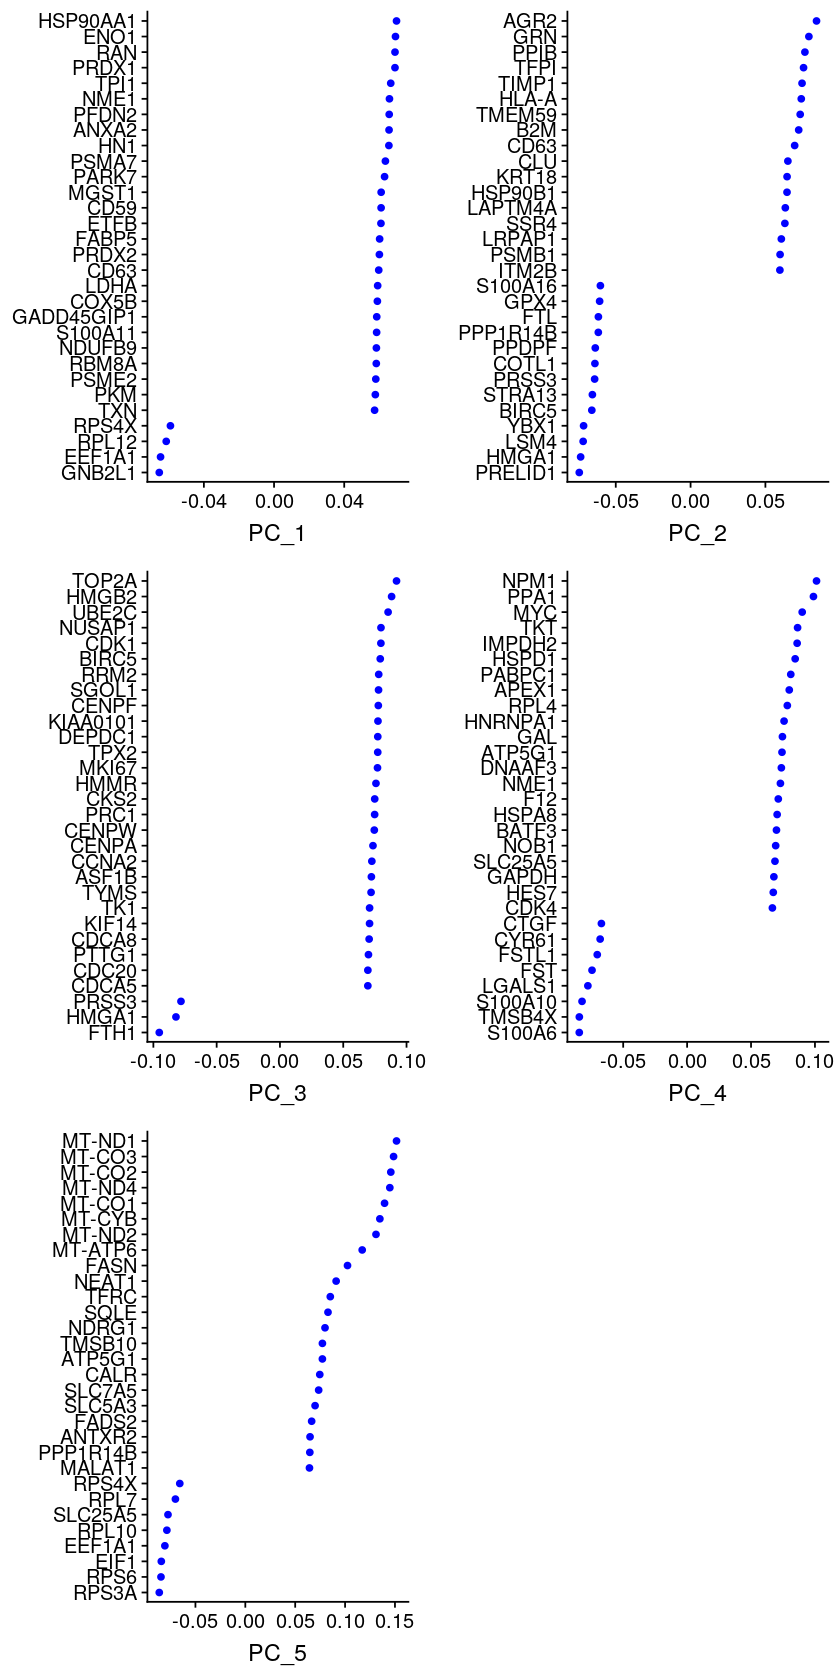

In [65]:
options(repr.plot.height = 14)
VizDimLoadings(object = sc, dims=1:5, reductions = "pca")

In [78]:
plist <- list(
    DimPlot(object = sc, reduction = "pca", dims=c(1,2)),
    DimPlot(object = sc, reduction = "pca", dims=c(1,3)),
    DimPlot(object = sc, reduction = "pca", dims=c(1,4)),
    DimPlot(object = sc, reduction = "pca", dims=c(1,5)),
    DimPlot(object = sc, reduction = "pca", dims=c(2,3)),
    DimPlot(object = sc, reduction = "pca", dims=c(2,4)),
    DimPlot(object = sc, reduction = "pca", dims=c(2,5)),
    DimPlot(object = sc, reduction = "pca", dims=c(3,4)),
    DimPlot(object = sc, reduction = "pca", dims=c(3,5)),
    DimPlot(object = sc, reduction = "pca", dims=c(4,5)))

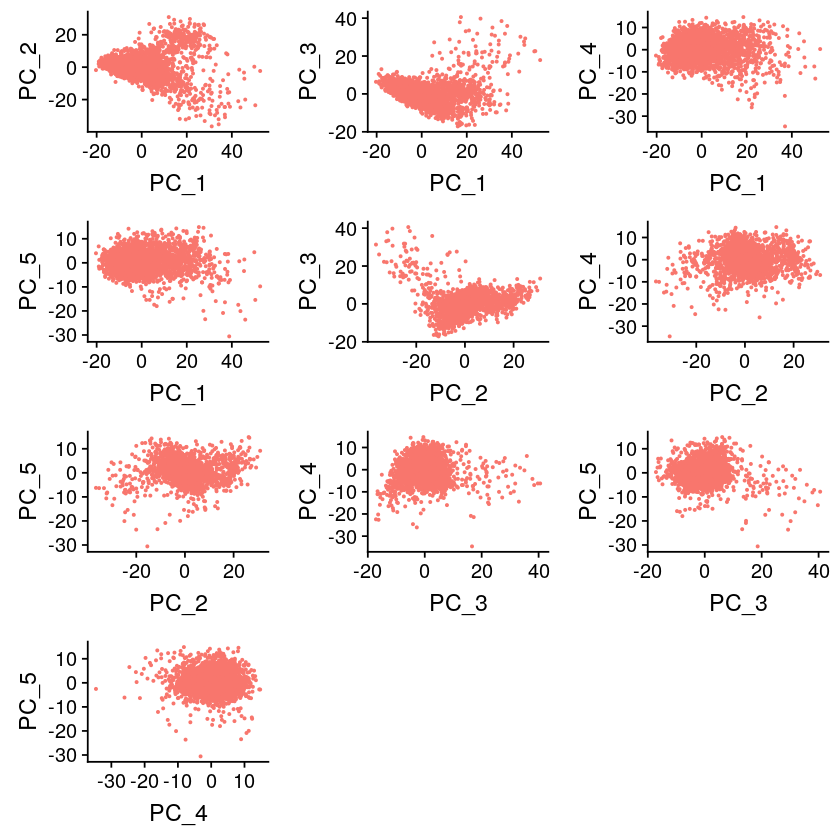

In [80]:
options(repr.plot.height = 7)
CombinePlots(plist, ncol=3, legend="none")

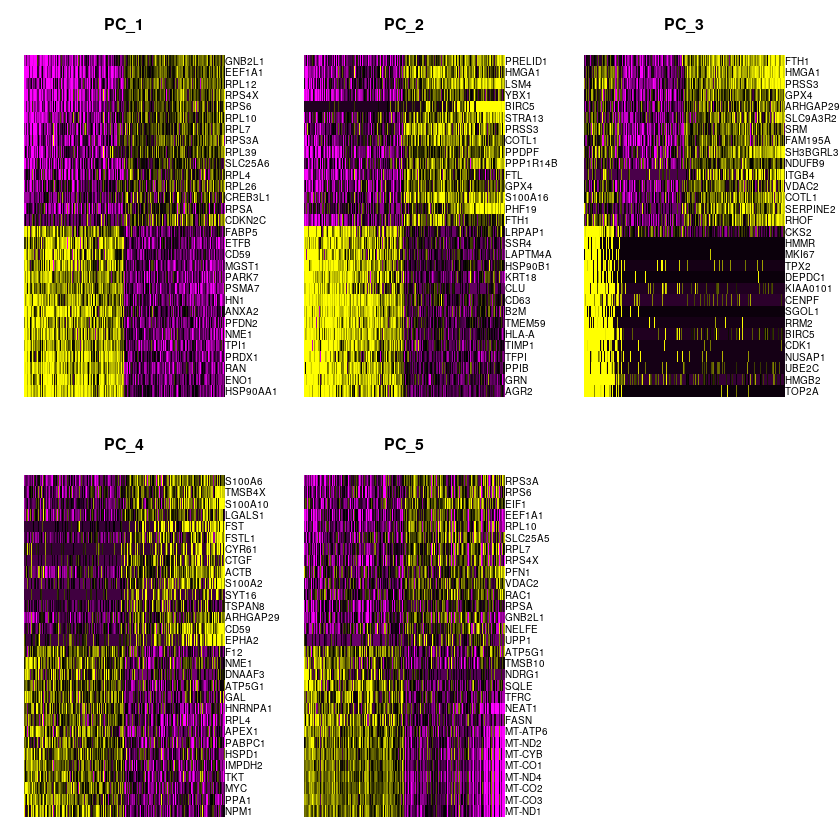

In [81]:
DimHeatmap(object = sc, dims = 1:5, cells=500, balanced = TRUE)

# Reducing the Dimensionality of the Set

Determining number of PC's to keep, we use Jackstraw Plot

In [92]:
sc <- JackStraw(object=sc, num.replicate = 100)

In [93]:
sc <- ScoreJackStraw(object = sc, dims = 1:20)

Warning message:
“Removed 21002 rows containing missing values (geom_point).”

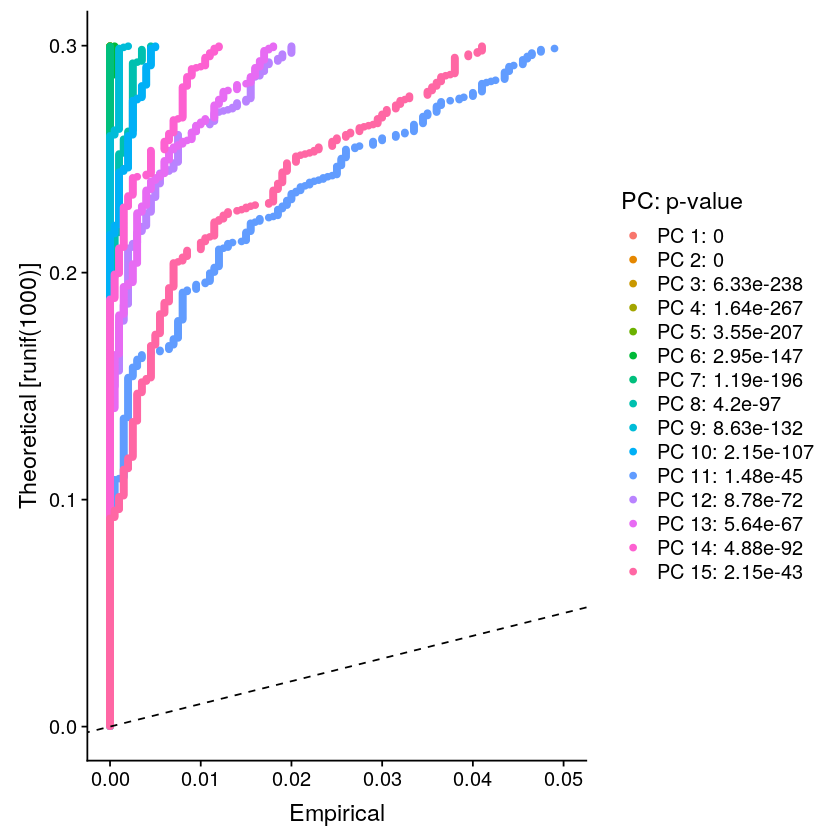

In [97]:
JackStrawPlot(object = sc, dims = 1:15, xmax = 0.05)

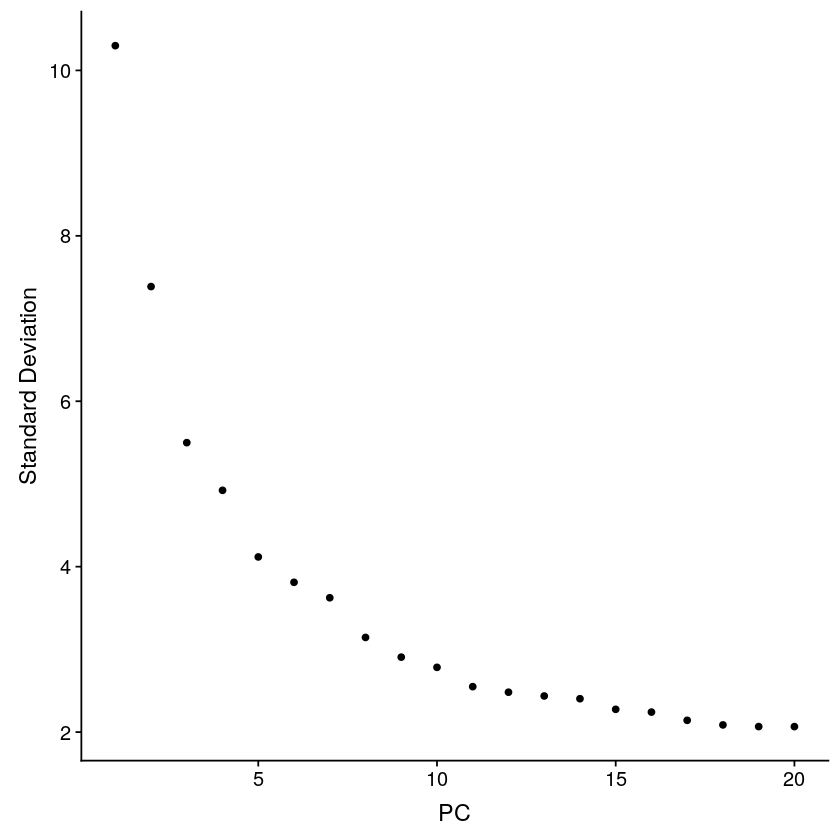

In [98]:
ElbowPlot(object = sc)

# Cell clustering

In [99]:
sc <- FindNeighbors(object = sc, dims=1:10)
sc <- FindClusters(object = sc, resolution = 0.5)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3448
Number of edges: 110821

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7753
Number of communities: 7
Elapsed time: 0 seconds


In [100]:
head(x = Idents(object = sc), 5)

AAACCTGCACGCTTTC AAACCTGGTGAAATCA AAACCTGGTTACAGAA AAACCTGTCACAGGCC 
               0                0                2                4 
AAACCTGTCCCATTTA 
               1 
Levels: 0 1 2 3 4 5 6

# Checkpoint

In [129]:
saveRDS(sc, "checkpoints/seurat.ctr.rds")

# Continue

In [1]:
sc <- readRDS("checkpoints/seurat.ctr.rds")

In [4]:
library("Seurat")
#reticulate::py_install(packages = 'umap-learn')

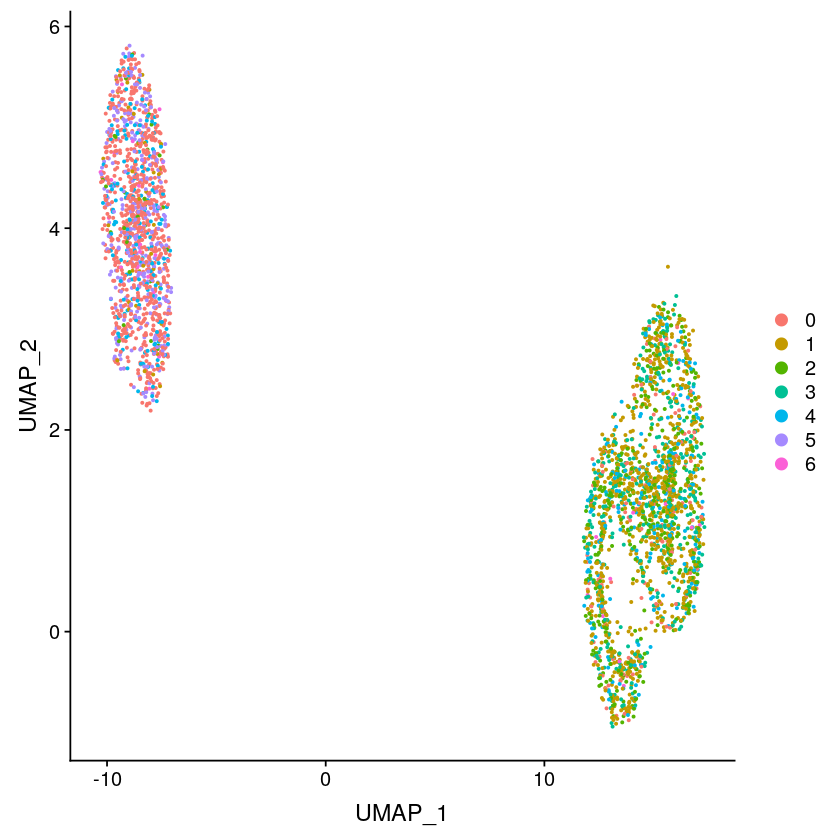

In [6]:
sc <- RunUMAP(object = sc, dims = 1:2)
DimPlot(object = sc, reduction = "umap")

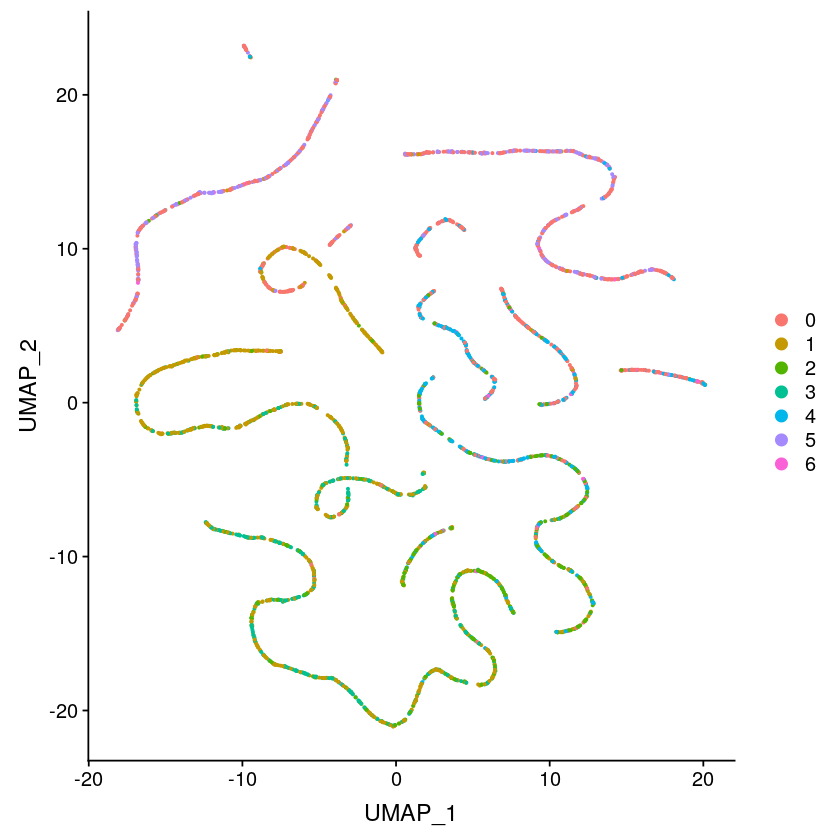

In [7]:
sc <- RunUMAP(object = sc, dims = 1:3)
DimPlot(object = sc, reduction = "umap")

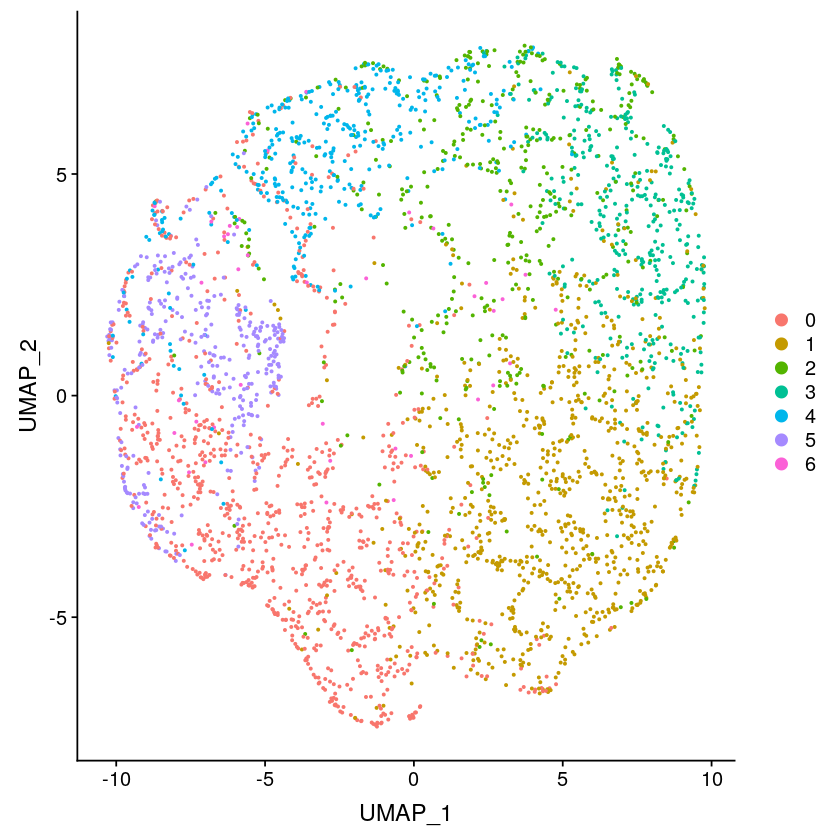

In [8]:
sc <- RunUMAP(object = sc, dims = 1:4)
DimPlot(object = sc, reduction = "umap")

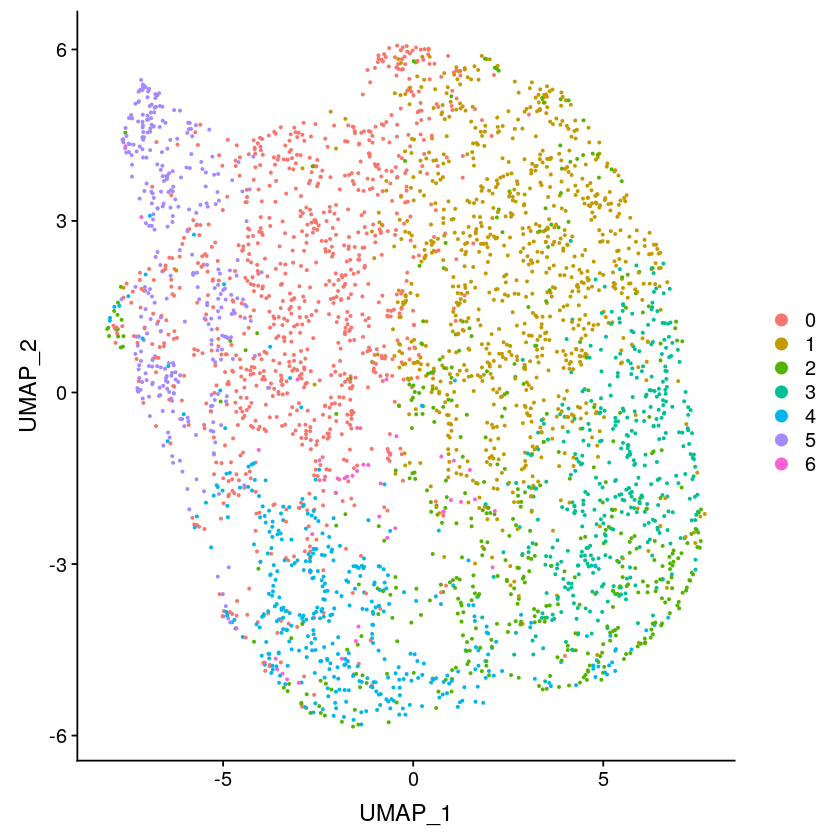

In [9]:
sc <- RunUMAP(object = sc, dims = 1:5)
DimPlot(object = sc, reduction = "umap")

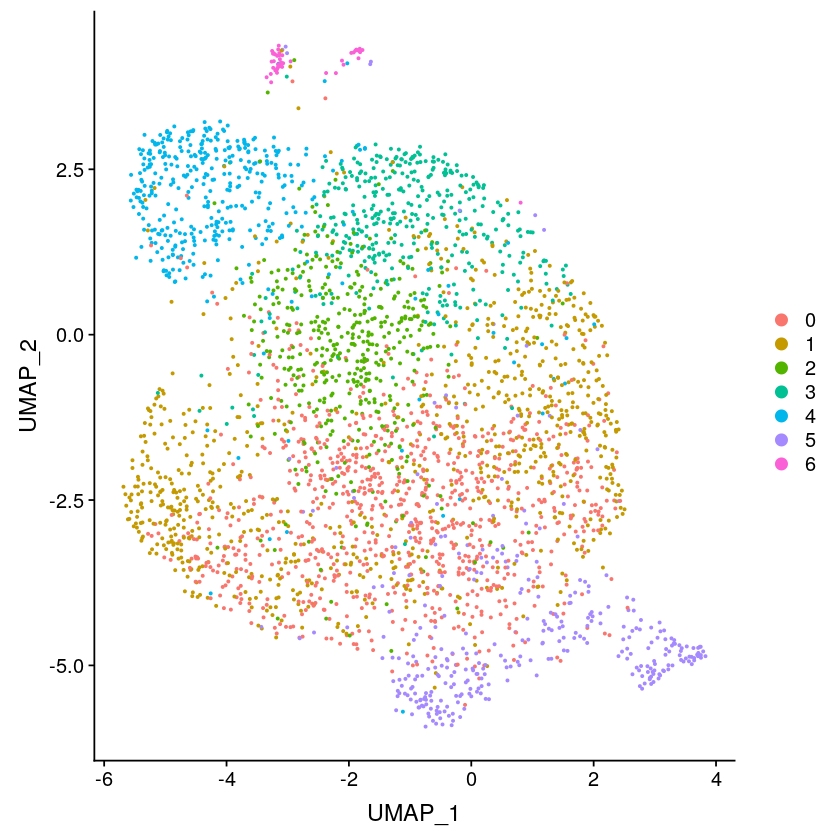

In [12]:
sc <- RunUMAP(object = sc, dims = 2:15)
DimPlot(object = sc, reduction = "umap")

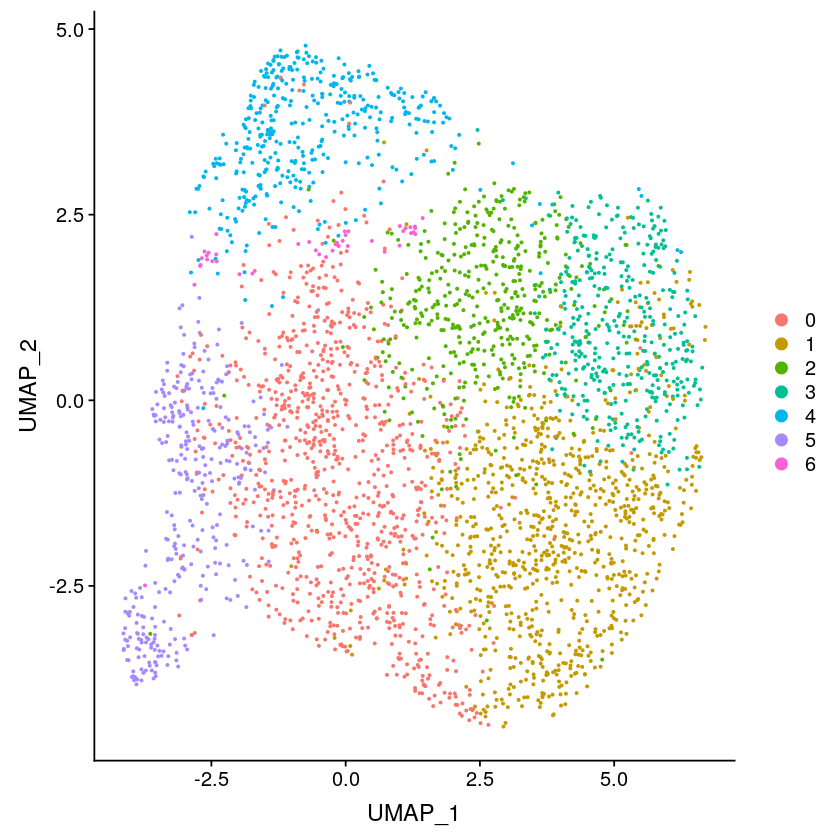

In [15]:
sc <- RunUMAP(object = sc, dims = 1:10)
DimPlot(object = sc, reduction = "umap")

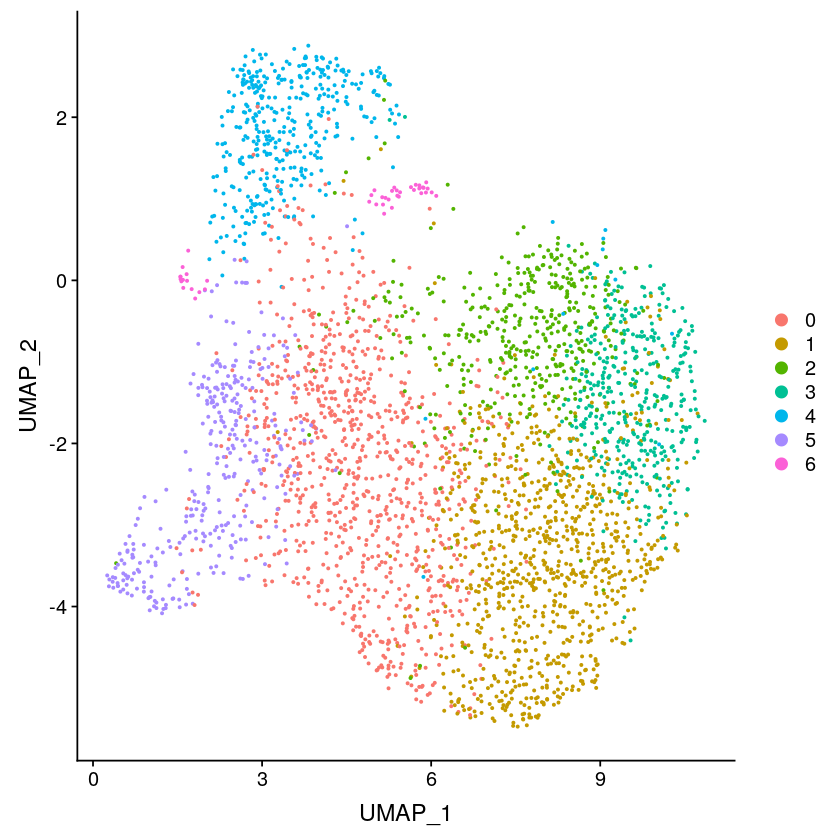

In [11]:
sc <- RunUMAP(object = sc, dims = 1:50)
DimPlot(object = sc, reduction = "umap")

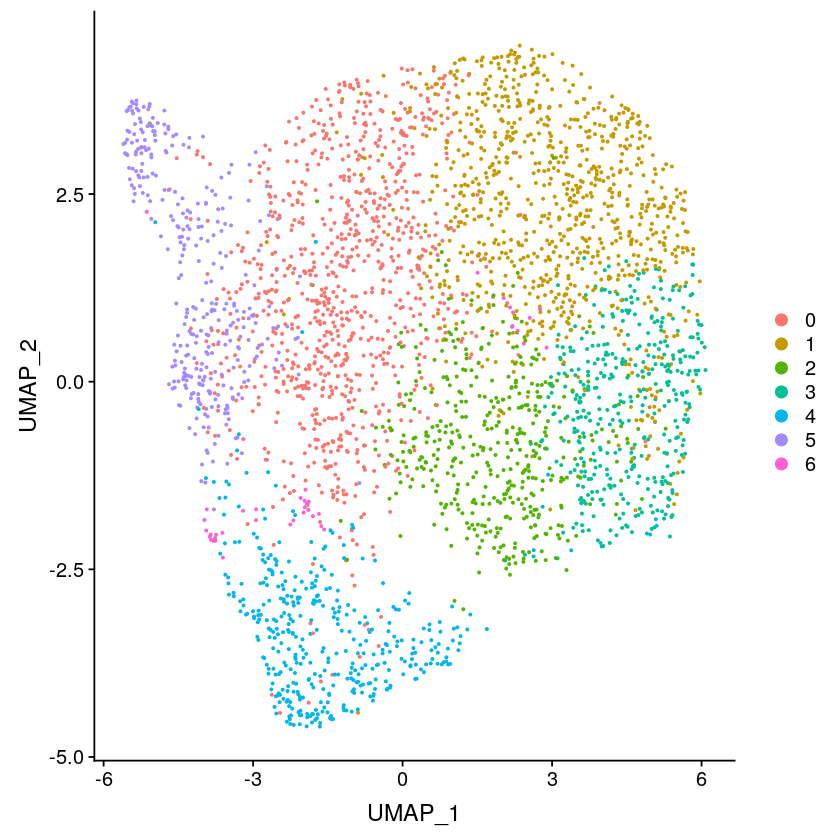

In [16]:
sc <- RunUMAP(object = sc, dims = 1:9)
DimPlot(object = sc, reduction = "umap")

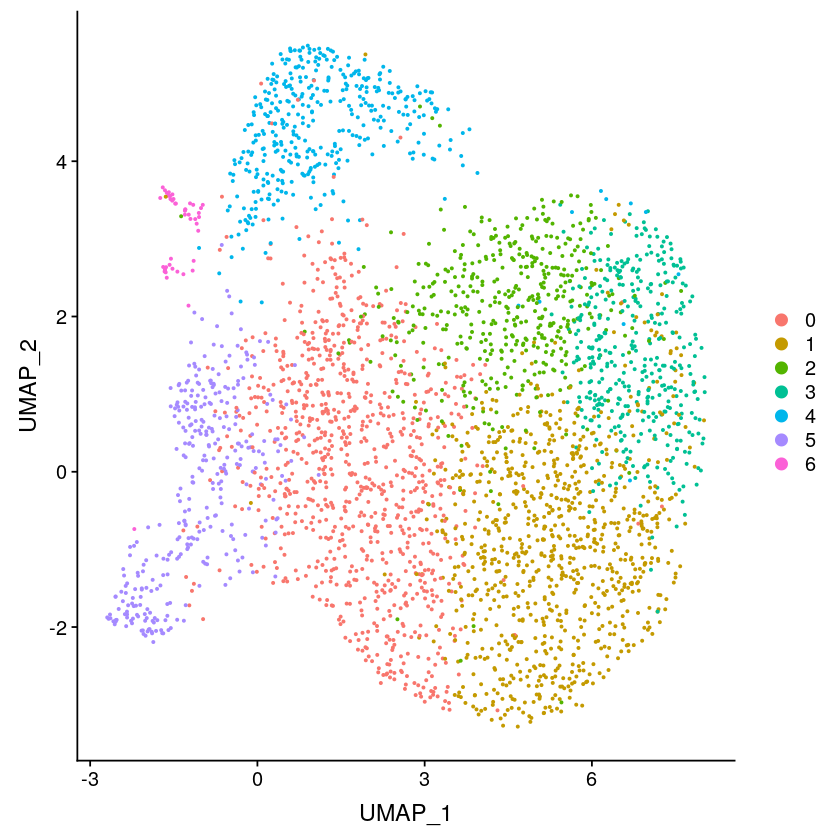

In [17]:
sc <- RunUMAP(object = sc, dims = 1:15)
DimPlot(object = sc, reduction = "umap")

1:15 seems to be the best. The plot is fairly noisy but seems to be in line with what we see with RaceID.

In [38]:
sc <- RunTSNE(object = sc)

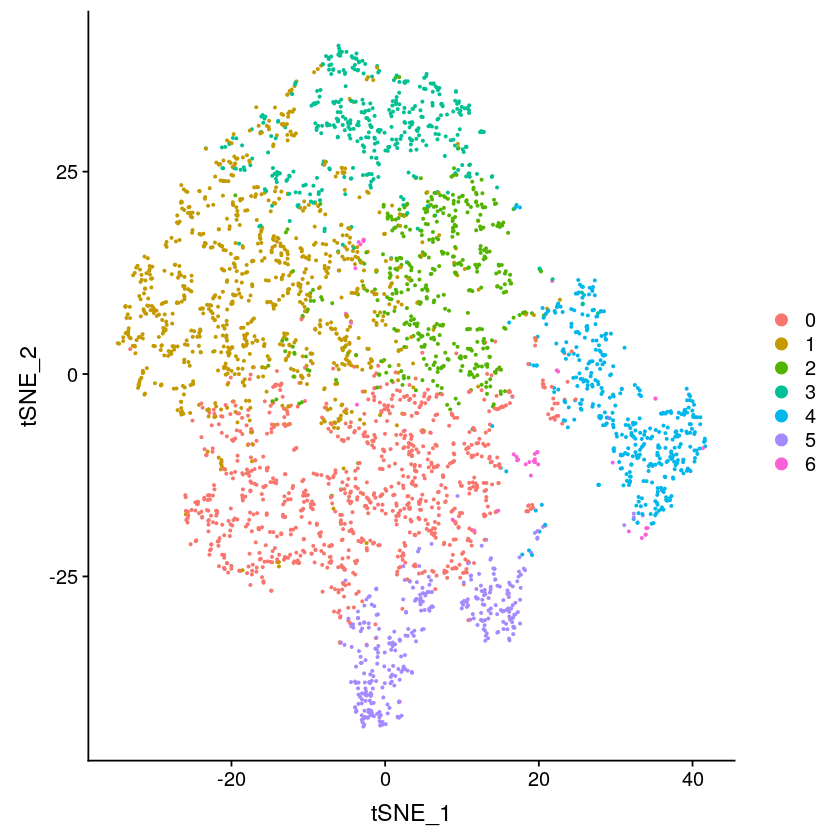

In [39]:
DimPlot(object = sc, reduction = "tsne")

TSNE for 1:15 is a bit worse than UMAP

In [18]:
saveRDS(sc, "checkpoints//seurat.ctr.15.rds")

# Clustering Biomarkers

In [19]:
sc.markers <- FindAllMarkers(object = sc, only.pos = T, 
                             min.pct = 0.25 ,  # marked detection at min percentage between two cells
                             logfc.threshold = 0.25)

Calculating cluster 0
Calculating cluster 1
Calculating cluster 2
Calculating cluster 3
Calculating cluster 4
Calculating cluster 5
Calculating cluster 6


In [20]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [22]:
sc.markers %>% group_by(cluster) %>% top_n(n=2, wt = avg_logFC)

p_val         avg_logFC pct.1 pct.2 p_val_adj     cluster gene  
1  1.889262e-113 0.3143628 1.000 0.991 3.521584e-109 0       SRM   
2   1.367608e-78 0.2994928 1.000 1.000  2.549221e-74 0       FTH1  
3  4.854036e-160 0.2577880 1.000 1.000 9.047923e-156 1       GNB2L1
4   1.517072e-40 0.2750612 1.000 1.000  2.827822e-36 1       NPM1  
5   4.293640e-37 0.2820093 0.939 0.849  8.003345e-33 2       LMO4  
6   9.810778e-25 0.2511374 0.822 0.665  1.828729e-20 2       UPP1  
7   1.878673e-55 0.3887338 0.739 0.495  3.501847e-51 3       PMP22 
8   5.942513e-53 0.4164284 0.988 0.925  1.107684e-48 3       CD24  
9  3.998398e-187 0.9990438 0.995 0.971 7.453014e-183 4       HLA-A 
10 1.103519e-184 1.2494926 1.000 0.998 2.056959e-180 4       CD63  
11  2.755730e-67 0.9567154 0.726 0.360  5.136680e-63 5       FST   
12  9.504999e-35 1.1561111 0.985 0.966  1.771732e-30 5       TUBA1B
13  2.323777e-09 1.1142167 0.932 0.989  4.331521e-05 6       UBC   
14  4.429284e-05 1.0660110 0.750 0.865  8.256185e-01 6       NUPR1

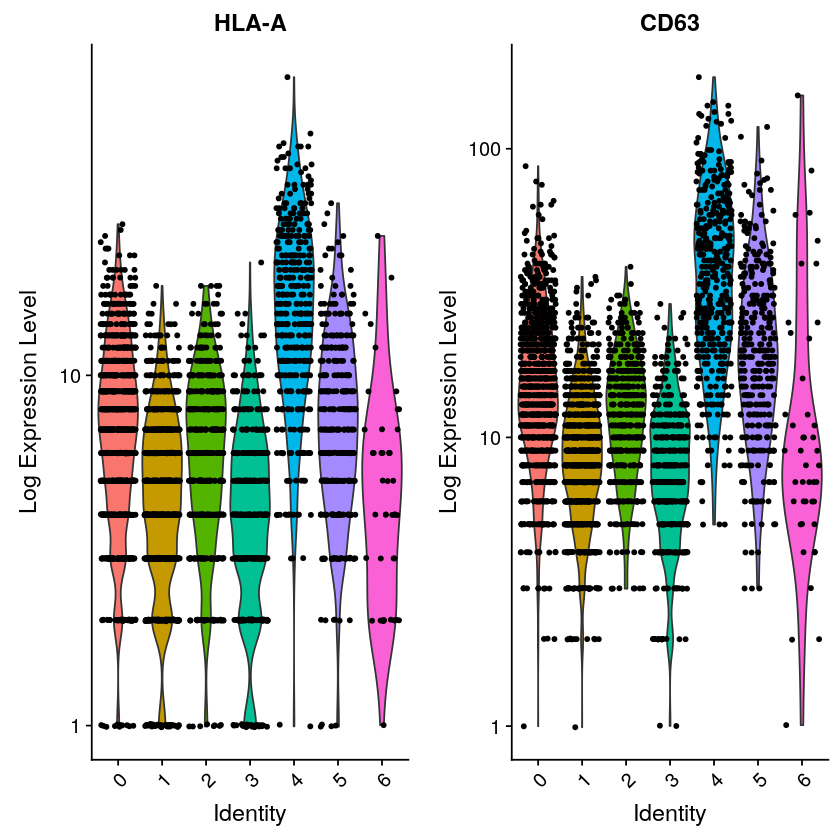

In [27]:
# Quick look at cluster 4 genes -- seem well defined
VlnPlot(object = sc, features = c('HLA-A', 'CD63'), slot = "counts", log = T)

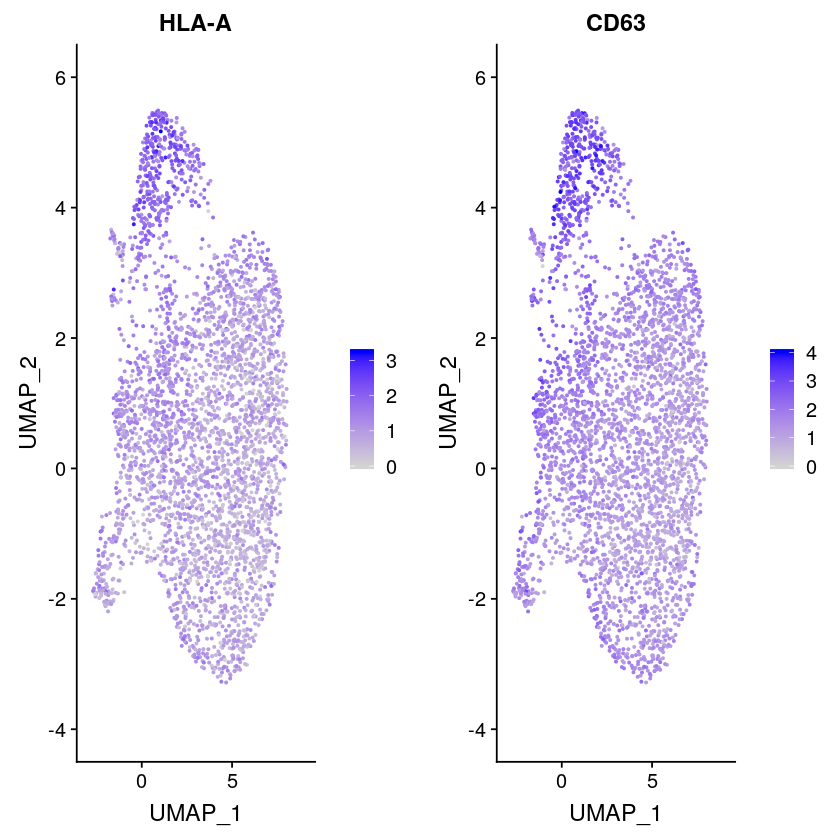

In [28]:
FeaturePlot(object = sc, features = c('HLA-A', 'CD63'))

These do not seem so specific to that cluster.... let's try another test.

In [30]:
sc.markers <- FindAllMarkers(object = sc, only.pos = T, 
                             min.pct = 0.25 ,  # marked detection at min percentage between two cells
                             logfc.threshold = 0.25,
                             test.use = "roc")

Calculating cluster 0
Calculating cluster 1
Calculating cluster 2
Calculating cluster 3
Calculating cluster 4
Calculating cluster 5
Calculating cluster 6


In [31]:
sc.markers %>% group_by(cluster) %>% top_n(n=2, wt = avg_logFC)

myAUC avg_diff  power avg_logFC pct.1 pct.2 p_val_adj cluster gene  
1  0.750 0.3143628 0.500 0.3143628 1.000 0.991 NA        0       SRM   
2  0.708 0.2994928 0.416 0.2994928 1.000 1.000 NA        0       FTH1  
3  0.803 0.2577880 0.606 0.2577880 1.000 1.000 NA        1       GNB2L1
4  0.765 0.2521037 0.530 0.2521037 1.000 1.000 NA        1       EEF2  
5  0.735 0.4164284 0.470 0.4164284 0.988 0.925 NA        3       CD24  
6  0.727 0.3887338 0.454 0.3887338 0.739 0.495 NA        3       PMP22 
7  0.948 0.9990438 0.896 0.9990438 0.995 0.971 NA        4       HLA-A 
8  0.945 1.2494926 0.890 1.2494926 1.000 0.998 NA        4       CD63  
9  0.755 0.9567154 0.510 0.9567154 0.726 0.360 NA        5       FST   
10 0.705 1.1561111 0.410 1.1561111 0.985 0.966 NA        5       TUBA1B
11 0.762 1.1142167 0.524 1.1142167 0.932 0.989 NA        6       UBC   
12 0.715 0.9411894 0.430 0.9411894 0.727 0.652 NA        6       ANXA1

In [37]:
sc.markers %>% group_by(cluster) %>% top_n(n=10, wt = avg_logFC)

myAUC avg_diff  power avg_logFC pct.1 pct.2 p_val_adj cluster gene     
1  0.750 0.3143628 0.500 0.3143628 1.000 0.991 NA        0       SRM      
2  0.741 0.2895525 0.482 0.2895525 1.000 0.997 NA        0       HMGA1    
3  0.729 0.2619351 0.458 0.2619351 1.000 0.985 NA        0       FAM195A  
4  0.725 0.2830562 0.450 0.2830562 1.000 0.976 NA        0       COTL1    
5  0.708 0.2994928 0.416 0.2994928 1.000 1.000 NA        0       FTH1     
6  0.803 0.2577880 0.606 0.2577880 1.000 1.000 NA        1       GNB2L1   
7  0.765 0.2521037 0.530 0.2521037 1.000 1.000 NA        1       EEF2     
8  0.754 0.3740150 0.508 0.3740150 1.000 0.990 NA        3       CD164    
9  0.748 0.3383715 0.496 0.3383715 1.000 1.000 NA        3       PRAC1    
10 0.747 0.3760752 0.494 0.3760752 0.900 0.733 NA        3       CDKN2C   
11 0.742 0.3623865 0.484 0.3623865 0.990 0.963 NA        3       GOLM1    
12 0.735 0.4164284 0.470 0.4164284 0.988 0.925 NA        3       CD24     
13 0.731 0.3819316 0.462 0.3819316 0.945 0.877 NA        3       SUCO     
14 0.727 0.3887338 0.454 0.3887338 0.739 0.495 NA        3       PMP22    
15 0.721 0.3141072 0.442 0.3141072 1.000 0.974 NA        3       GBA2     
16 0.716 0.3810736 0.432 0.3810736 0.993 0.978 NA        3       LDOC1    
17 0.705 0.2964053 0.410 0.2964053 0.933 0.848 NA        3       ARFGEF3  
18 0.951 0.9291093 0.902 0.9291093 1.000 0.989 NA        4       GRN      
19 0.948 0.9990438 0.896 0.9990438 0.995 0.971 NA        4       HLA-A    
20 0.945 1.2494926 0.890 1.2494926 1.000 0.998 NA        4       CD63     
21 0.929 0.8448850 0.858 0.8448850 1.000 1.000 NA        4       B2M      
22 0.914 0.8712749 0.828 0.8712749 0.995 0.923 NA        4       PPIB     
23 0.913 0.9189690 0.826 0.9189690 0.992 0.959 NA        4       TIMP1    
24 0.913 0.9022403 0.826 0.9022403 1.000 1.000 NA        4       HSP90AA1 
25 0.908 0.8584387 0.816 0.8584387 0.985 0.868 NA        4       HSP90B1  
26 0.887 0.8509061 0.774 0.8509061 1.000 0.999 NA        4       ENO1     
27 0.884 0.9547314 0.768 0.9547314 0.982 0.909 NA        4       AGR2     
28 0.901 0.8091587 0.802 0.8091587 1.000 0.992 NA        5       S100A16  
29 0.883 0.9071171 0.766 0.9071171 1.000 0.998 NA        5       HMGA1    
30 0.882 0.8858380 0.764 0.8858380 1.000 0.991 NA        5       PRSS3    
31 0.867 0.8439814 0.734 0.8439814 1.000 0.996 NA        5       MT2A     
32 0.844 0.8113503 0.688 0.8113503 0.925 0.612 NA        5       TNFRSF12A
33 0.796 0.9261301 0.592 0.9261301 0.693 0.180 NA        5       BIRC5    
34 0.785 0.8118283 0.570 0.8118283 0.970 0.885 NA        5       CKS1B    
35 0.767 0.8754488 0.534 0.8754488 0.985 0.899 NA        5       UBE2S    
36 0.755 0.9567154 0.510 0.9567154 0.726 0.360 NA        5       FST      
37 0.705 1.1561111 0.410 1.1561111 0.985 0.966 NA        5       TUBA1B   
38 0.854 0.9253673 0.708 0.9253673 1.000 0.971 NA        6       ANXA2    
39 0.788 0.6133363 0.576 0.6133363 1.000 0.999 NA        6       ENO1     
40 0.762 1.1142167 0.524 1.1142167 0.932 0.989 NA        6       UBC      
41 0.727 0.7620482 0.454 0.7620482 1.000 1.000 NA        6       EIF1     
42 0.723 0.9042216 0.446 0.9042216 1.000 0.967 NA        6       SQSTM1   
43 0.721 0.6529252 0.442 0.6529252 1.000 1.000 NA        6       HSP90AA1 
44 0.715 0.9411894 0.430 0.9411894 0.727 0.652 NA        6       ANXA1    
45 0.711 0.6495007 0.422 0.6495007 0.955 0.992 NA        6       HSP90AB1 
46 0.705 0.6443081 0.410 0.6443081 0.955 0.973 NA        6       PHLDA2   
47 0.703 0.6713720 0.406 0.6713720 0.841 0.833 NA        6       TUBB4B

No change to the genes detected...
Proceeding under the assumption that this is the best resolution.

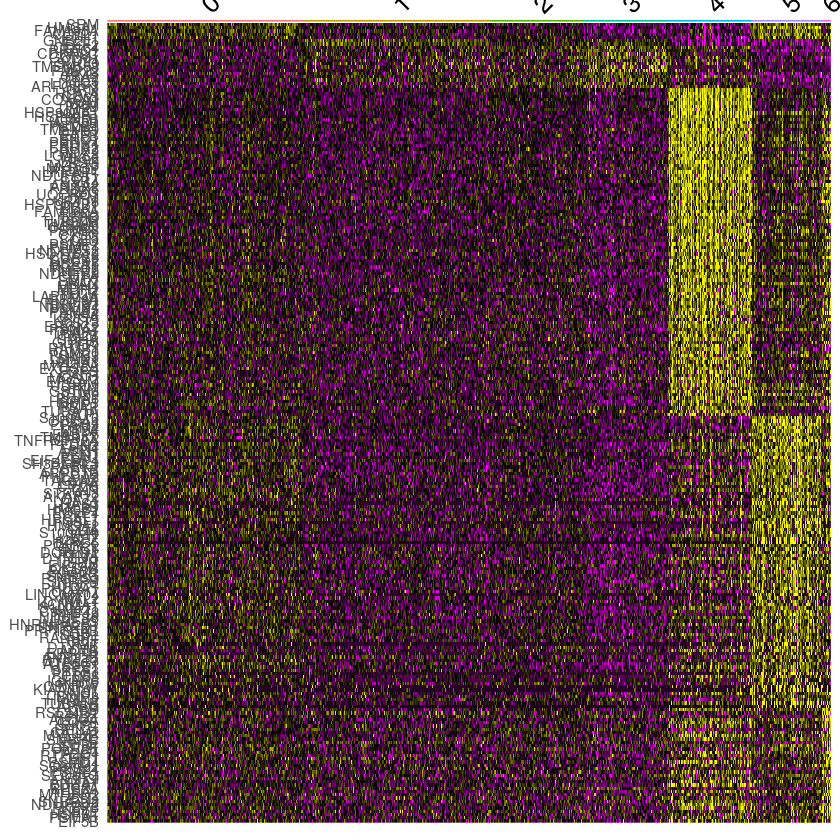

In [33]:
topN <- sc.markers %>% group_by(cluster) %>% top_n(n=100, wt=avg_logFC)
DoHeatmap(object=sc, features = topN$gene) + NoLegend()

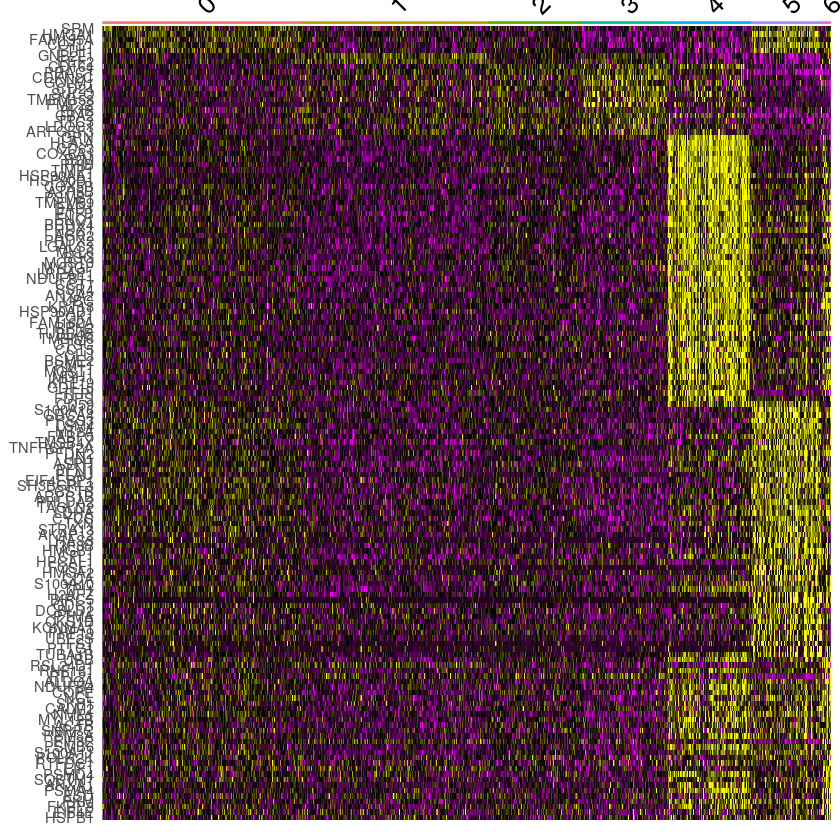

In [34]:
topN <- sc.markers %>% group_by(cluster) %>% top_n(n=50, wt=avg_logFC)
DoHeatmap(object=sc, features = topN$gene) + NoLegend()

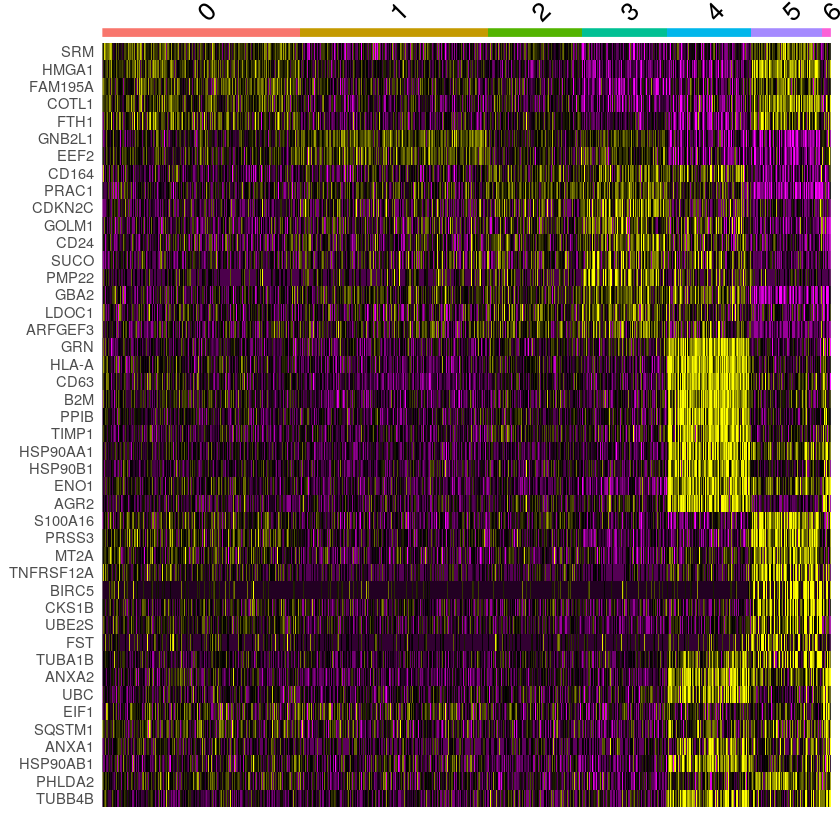

In [35]:
topN <- sc.markers %>% group_by(cluster) %>% top_n(n=10, wt=avg_logFC)
DoHeatmap(object=sc, features = topN$gene) + NoLegend()

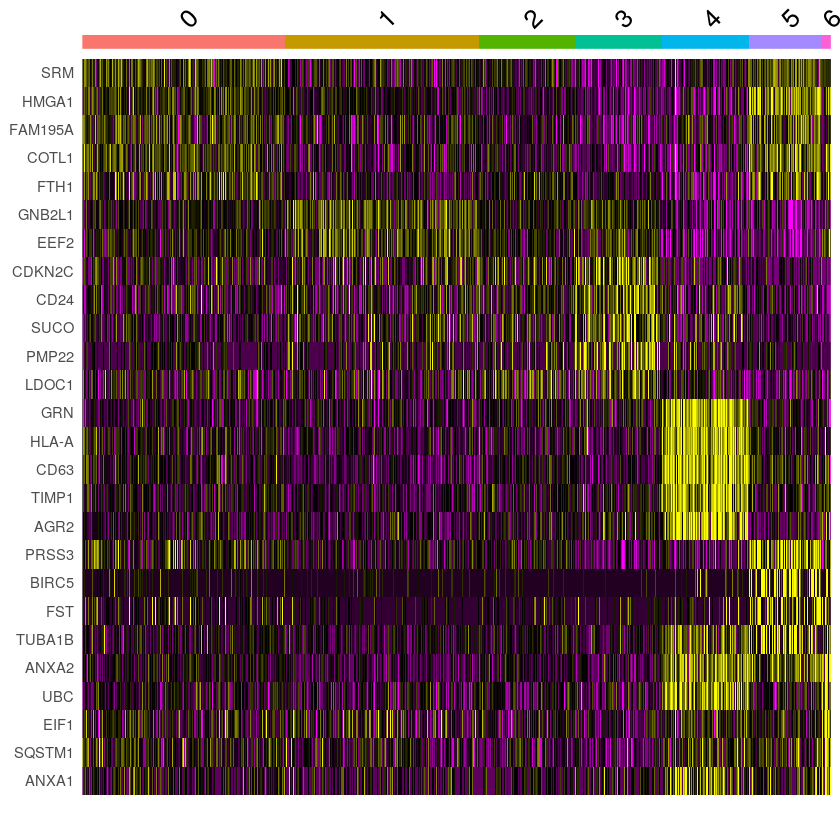

In [36]:
topN <- sc.markers %>% group_by(cluster) %>% top_n(n=5, wt=avg_logFC)
DoHeatmap(object=sc, features = topN$gene) + NoLegend()

Cluster 4 seems to be the most well-defined cluster

Other cluster markers:
 * Cluster 0 - Basal cells [link](https://panglaodb.se/search.html?query=%22SRM%20AND%20COTL1%20AND%20FTH1%22&species=3&tumor=0&nonadult=0)
 * Cluster 1 - Erythroid pre-cursor? [link](https://panglaodb.se/search.html?query="EEF2"&species=3&tumor=0&nonadult=0)
 * Cluster 2 - B-cells [link](https://panglaodb.se/search.html?query=%22CDKN2C%20AND%20CD24%22&species=3&tumor=0&nonadult=0)
 * Cluster 3 - Fibroblasts [link](https://panglaodb.se/search.html?query=%22PMP22%20AND%20CDKN2C%22&species=3&tumor=0&nonadult=0) (same expression as cluster 2 but higher...? Is that consistent with the lineage?)
 * Cluster 4 - Langerhans cells [link](https://panglaodb.se/search.html?query=%22GRN%20AND%20CD63%20AND%20B2M%20AND%20PPIB%22&species=3&tumor=0&nonadult=0) 
 * Cluster 5 - Hepatocytes [link](https://panglaodb.se/search.html?query=%22HMGA1%20AND%20BIRC5%20AND%20COTL1%22&species=3&tumor=0&nonadult=0)